In [2]:
# Importamos librerías
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import math

In [3]:
# Creación de datos
def spiral_xy(i, spiral_num):
    """
    Create the data for a spiral.
    """
    o = i/16 * math.pi
    r = 6.5 * ((104 - i)/104)
    x = (r * math.cos(o) * spiral_num)/13 + 0.5
    y = (r * math.sin(o) * spiral_num)/13 + 0.5
    return (x, y)

def spiral(spiral_num):
    return [spiral_xy(i, spiral_num) for i in range(80)]


spiral_1 = spiral(1)
spiral_2 = spiral(-1)

data_class_1 = [[x,y,1] for x,y in spiral_1]
data_class_0 = [[x,y,0] for x,y in spiral_2]
data = data_class_1+data_class_0
data_df =pd.DataFrame(data)
data_df = data_df.sample(frac=1).reset_index(drop=True)
x, y  = data_df.iloc[:,:-1],data_df.iloc[:,-1]

a_x = list(zip(*spiral_1))[0]
a_y = list(zip(*spiral_1))[1]

b_x = list(zip(*spiral_2))[0]
b_y = list(zip(*spiral_2))[1]


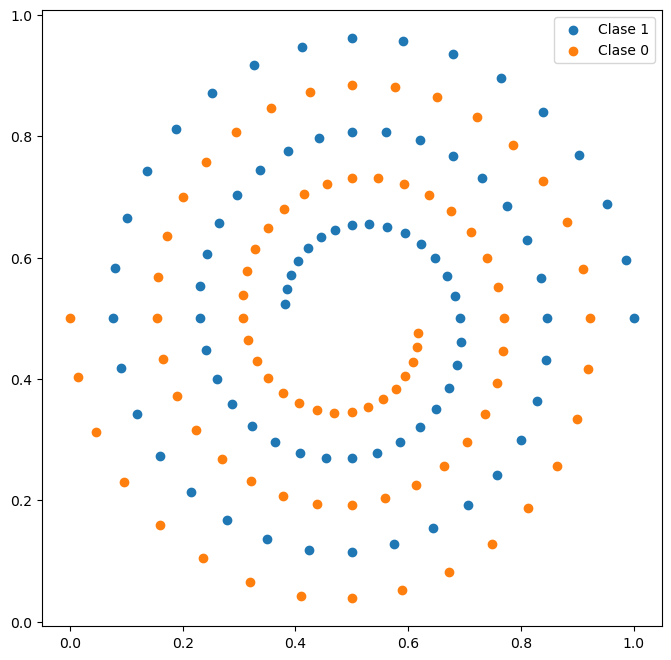

In [4]:
# Visualización
plt.figure(figsize=(8, 8))
plt.scatter(a_x,a_y, label = 'Clase 1')
plt.scatter(b_x,b_y, label = 'Clase 0')
plt.legend()
plt.savefig('two_spirals.jpg')
plt.show()

In [5]:
# Implementamos el modelo
def logistic_polinomial_regression(degree, x, y):
  poly = PolynomialFeatures(degree, interaction_only=False, include_bias=False)
  X_poly = poly.fit_transform(x)
  lr = LogisticRegression()
  lr.fit(X_poly,y)
  predictions = lr.predict(X_poly)
  class_1_p = x[predictions==1]
  class_0_p = x[predictions==0]
  return  class_1_p, class_0_p

class_1_p,class_0_p = logistic_polinomial_regression(500,x, y)

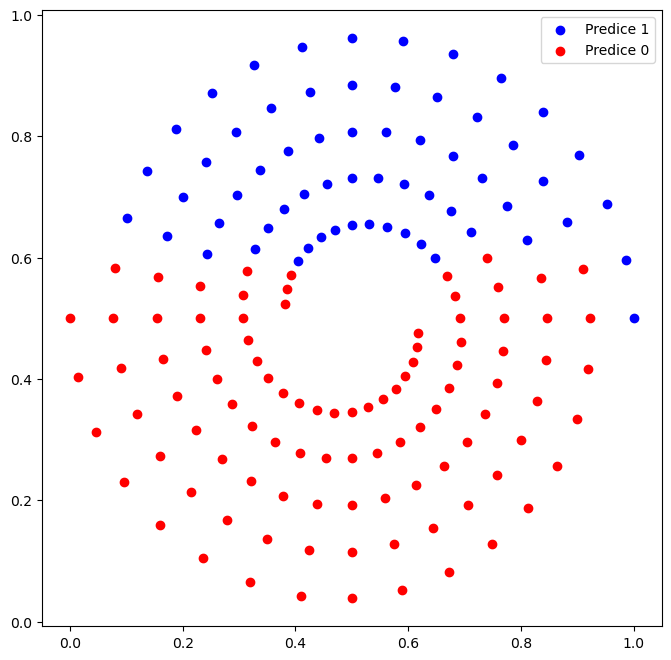

In [6]:
# Visualización de la predicción
plt.figure(figsize=(8, 8))
plt.scatter(class_1_p[0],class_1_p[1], color = 'b', label = 'Predice 1')
plt.scatter(class_0_p[0],class_0_p[1], color = 'r', label = 'Predice 0')
plt.legend()
plt.savefig('spiral_logistic_regression.jpg')
plt.show()